In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
clean_data = data.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis = 1)

In [6]:
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [7]:
clean_data["Sex"] = LabelEncoder().fit_transform(clean_data["Sex"])

In [8]:
clean_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


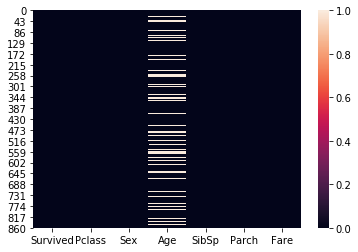

In [9]:
sns.heatmap(clean_data.isnull())
plt.show()

In [10]:
clean_data["Age"] = clean_data["Age"].fillna(clean_data["Age"].mean())

In [11]:
clean_data["Age"].isnull().sum()

0

In [12]:
clean_data.loc[1]

Survived     1.0000
Pclass       1.0000
Sex          0.0000
Age         38.0000
SibSp        1.0000
Parch        0.0000
Fare        71.2833
Name: 1, dtype: float64

In [13]:
clean_data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [14]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',"Fare"]
output_cols = ['Survived']

In [15]:
X = clean_data[input_cols]
Y = clean_data[output_cols]

In [16]:
X.shape, Y.shape

((891, 6), (891, 1))

### Let's first define Entropy and Information Gain before building the decision tree

#### Entropy is the mayor of randomeness, and it is maximum when the probability of each class is .5 and is equl to (-sumation P log P)
We calculate entropy about a given feature, we will be given a column and we will see how many unique values are there in the column and accordingly we are going to claculate teh entropy 

We will first see what all unique values are there in the column and return counts = true 
N = total no. of entries in that column

Example
col= np.array[1,1,1,0,1,0,0]
entropy of col will return two things[0,1]unique values and their frequency[3,4]
##### iterate over the frequency and then find the probability and then add that to the entropy 


In [17]:
def entropy (col):
    
    counts = np.unique(col, return_counts= True)
    N = float(col.shape[0])
    ent = 0.0
    
    for ix in counts[1]: # we are going to iterate over the second part that is the frequency 
        p = ix/N         # probability 
        ent += (-1.0*p*np.log2(p))   # formula for entropy 
        
    return ent    
        
    

In [18]:
#col= np.array([1,1,1,0,1,0,0,0])    #we know when there are 50% examples of one class and 50% examples of 
                                    # other the entropy is max and that is what we are getting 
#entropy(col) 

##### Before information gain we have to split the data into two parts 
x_data is a data frame with data = empty list and the columns is equal to whatever the columns are available in the above node will also be available in the child node 

#####         val = x_data[fkey].loc[ix]   ↓
let's say we are splitting people based upon income, in the decision tree we have 100 examples in the top node and after splitting we have 40 on the left node and 60 on the right node , how to select each example and in which node it is going to go x_data[fkey] means we are considering income column and the current value in the ith row, so if this value is greater than threshold [fval] we wil add it on the right side and if it is less than the threshold it will be added on the left side  


In [19]:
# Two empty data frames
def divide_data (x_data, fkey, fval):
    # work with pandas data frames , although we can do with the numpy as well 
    x_right = pd.DataFrame([],columns=x_data.columns)
    x_left = pd.DataFrame([], columns=x_data.columns)
    
# We will copy data to the data frames 

    for ix in range (x_data.shape[0]): # iterate over the original data set 
        # compute the value in the given row and the given column
        val = x_data[fkey].loc[ix]
        
        if val > fval :
            x_right = x_right.append(x_data.loc[ix])    # we append entrie row 
        else:
            x_left = x_left.append(x_data.loc[ix])
            
    return x_left , x_right 

In [20]:
                 # TEST
#x_left,x_right = divide_data(clean_data[:10],"Sex",0.5)
#print(x_left)
#print(x_right)


### Information Gain 
For information gain we can assume that we are getting the entire matrix which is x_data  and we are going to make a split based upon some certainity and we are naming the key as key and the threshold value as fval 
##### suppose in our x_data we have three features age,sex,income we will calculate information gain of all three and select the one with the maximumm information gain let's assume it is income then we will divide our dataset into two parts and we are going to choose a threshold based on the income  and then decide what all people should go to right and left (let's say if income > 5 lakh ) then those people will buy the car
##### so fkey in the above case is the income and fval is 5 lakh
###### and to calculate the threshold we wil do some kind of averaging we can take the mean or the middle vlaue 

In [21]:
def information_gain(x_data, fkey, fval):
    
    left,right = divide_data(x_data,fkey,fval)
    
    # % of samples on left and right side 
    
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    
# one thing can happen here, all examples are on one side which means that we have already reached the node
# where we can't split data further 

    if left.shape[0] == 0 or right.shape[0] == 0:

# in this case we can say that our information gain is minimum and we can return - infinity 
        return -1000000


# otherwise we can continue to compute information gain 
    i_gain = entropy(x_data.Survived) - (l*entropy(left.Survived)+r*entropy(right.Survived))
    
    return i_gain
 

    
    

### Now, Let's test our function
 print (i_gain)     print information gain of that column , we will pick that col from the data matrix and for splitting the value that we are going to keep is the mean value so we are making a binary decision based on the value if it is greater or less than the mean 

In [22]:
for fx in X.columns:  # iterate over all the columns 
    print(fx)         # print the column name 
    print (information_gain (clean_data,fx,clean_data[fx].mean()))  

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.001158644038169343
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


We are getting entropy of each column and our Decision Tree Algorithm will pick that column that has the Maximum Information Gain, since Sex has the maximum information gain so the first node that we are going to pick to say whether a person is going to survive or not that decision will be based upon sex because it offers maximum reduction in entropy 

#  Implementing a Decision Tree

#### While building decission trees we should keep in mind the depth and the maximum depth because decission trees can overfit.If we build a tree that is too deep  instead of some generalization, it will try to give the prediction for each and every example. There are ways in which we can reduce overfitting (but here we are restricting the tree to some particular depth let's say we won't go deeper than k levels 
###### If we plot a graph of number of nodes and accuracy, the training accuracy will increase as we increase the number of nodes but the test or the validation accuracy will increase to a certain point and then it will start to drop so that is why we need to restrict it to a certain point where the validation accuracy is maximum and there are two approaches, one is post prunning which means that we first grow the tree to the fullest and then start removing those nodes that give poor generalization or those that reduce our validation accuray  and the other way is EARLY STOPPING which we are going to use (we will stop after a certain depth)  that is why we are using the parameters depth = 0 the current depth and the depth where we want to stop  max_depth = 5 
##### self.left, self.right = None For each node we will have a left and right  variables which are pointing to the left and the right nodes also at every node we are going to store the feature for which we are going to split (self.fkey = None) and also the threshold value (fval) that we have computed from the data 
###### At every node self.max_depth shold be equal to the  maximum depth and whatever the given depth is that will be the depth of that node 
###### self.target means what we are going to predict at a particular node ( if we have a leaf node with 50 examples and out of 50 examples 40 are having YES and 10 are having NO so our prediction for this entire node will be YES and if we predict Yes for all the examples the accuracy is going to be 80% so we are taking a majority predicton at the leaf node  

In [23]:
class DecissionTree:
    
    # constructor
    def __init__ (self,depth=0, max_depth=5):
        self.left = None
        self.right = None 
        self.fkey = None 
        self.fval = None
        self.max_depth = max_depth
        self.depth = depth
        self.target = None
        
    def train (self,X_train):
        
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare']
        info_gains = []  # list of info gains to see  all info gains 
        
        for fx in features :
            i_gain = information_gain(X_train,fx,X_train[fx].mean())
            info_gains.append(i_gain)
            
       # CHOOSE THE COLUMN WHICH GIVES THE MAX I_GAIN
    
        self.fkey = features[np.argmax(info_gains)] # key is going to be that feature which maimizes the info gain and we find out the index of that in the list and we see which col is that which maximises the information gain 
        self.fval = X_train[self.fkey].mean()
        print("Making Tree Feature is",self.fkey)
        
        
        # Split the Data based on maximum i_gain
        
        data_left, data_right = divide_data(X_train,self.fkey, self.fval)
        data_left = data_left.reset_index(drop=True) # when we pick and random rows from a column in clean data and place in the left and right the index position is not in order so to set the index in the order in the left and the right we reset index to make it in order 1 2 3 ..
        data_right = data_right.reset_index(drop=True)
        
        
        # if we hit the base case where there are no examples on one side we will assign a target label to it that is survived or not 
        
                    # 1 BASE CASE : TRUELY A LEAF NODE !
        
        if data_left.shape[0] == 0 or data_right.shape[0] == 0 :
            if X_train.Survived.mean() >= 0.5 :
                self.target = "Survived"
            else:
                self.target = "Dead"
            return 
        
        # 2 BASE CASE : STOP EARLY WHEN DEPTH BECOMES EQUAL TO MAX_DEPTH !
        
        if(self.depth>=self.max_depth):
            if X_train.Survived.mean() >= 0.5 :
                self.target = "Survived"
            else:
                self.target = "Dead"
            return 
        
        
        # BUILD THE TREE RECURCIVELY (if we don't hit either of the base case in that case we will make the left of the current node point to the smaller sub tree and we will call the decision tree constructor in wich the depth of the child tree is going to be 1 more than the parent )
            
        self.left = DecissionTree(depth=self.depth+1 , max_depth = self.max_depth)
        self.left.train(data_left)                                                 # we call the train method and the data we are going to give is the data that we got after splitting
        
        self.right = DecissionTree(depth=self.depth+1, max_depth = self.max_depth)
        self.right.train(data_right)
        
        # WE CAN ALSO SET THE TARGET AT EVERY NODE 
        
        
        if X_train.Survived.mean() >= 0.5 :
            self.target = "Survived"
        else:
            self.target = "Dead"
        return 
    
    def predict(self, test):
        if test[self.fkey]>self.fval:
             # Go Right
            if self.right is None:
                return self.target
             # else we will call the right sub tree to get the right value
            return self.right.predict(test)  # recursive call 
        else:
            if self.left is None:  # if left sub child does not exist 
                return self.target # whatever is the target at the current node 
                # otherwise recursively go to the left hand side 
            return self.left.predict(test)
            

## Making Predictions 

### Train Validation-Test Set Split
##### When we create a decision tree, we are going to create 3 sets one is training set which is given, validation set - sometimes it is given sometimes not (we can split the training set where we can set 20% of data for the validation) and we also have the testing set 
###### For now we will use training and testing 

In [24]:
split = int(0.7*clean_data.shape[0])
train_data = clean_data[:split]
test_data = clean_data[split:]
test_data = test_data.reset_index(drop=True)

In [25]:
clean_data.shape[0]

891

In [26]:
train_data.shape, test_data.shape

((623, 7), (268, 7))

In [27]:
dt = DecissionTree()
dt.train(train_data)

Making Tree Feature is Sex
Making Tree Feature is Pclass
Making Tree Feature is Age
Making Tree Feature is SibSp
Making Tree Feature is Pclass
Making Tree Feature is Age
Making Tree Feature is Age
Making Tree Feature is SibSp
Making Tree Feature is Parch
Making Tree Feature is Pclass
Making Tree Feature is SibSp
Making Tree Feature is Fare
Making Tree Feature is Parch
Making Tree Feature is Age
Making Tree Feature is Pclass
Making Tree Feature is Age
Making Tree Feature is Age
Making Tree Feature is Parch
Making Tree Feature is SibSp
Making Tree Feature is Fare
Making Tree Feature is Age
Making Tree Feature is Age
Making Tree Feature is Fare
Making Tree Feature is Age
Making Tree Feature is Age
Making Tree Feature is Fare
Making Tree Feature is Age
Making Tree Feature is Parch
Making Tree Feature is Fare
Making Tree Feature is Fare
Making Tree Feature is Fare
Making Tree Feature is Age
Making Tree Feature is Fare
Making Tree Feature is Parch
Making Tree Feature is Fare
Making Tree Feat

In [28]:
print(dt.fkey)
print(dt.fval)
print(dt.left.fkey)
print(dt.left.fval)
print(dt.right.fkey)
print(dt.right.fval)

Sex
0.6292134831460674
Pclass
2.1774891774891776
Fare
25.149456377551008


In [29]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [30]:
y_pred[:10]

['Dead',
 'Dead',
 'Dead',
 'Dead',
 'Survived',
 'Dead',
 'Dead',
 'Dead',
 'Dead',
 'Dead']

y_pred is an array of dead and survived, we will convert it into 0's and 1's using label encoder 

In [31]:
y_actual = test_data[output_cols]

In [32]:
print(y_actual)

     Survived
0           0
1           0
2           0
3           0
4           1
..        ...
263         0
264         1
265         0
266         1
267         0

[268 rows x 1 columns]


##### y_actual was 00000111001 but we are getting dead and survived so we use label encoder 

In [33]:
y_pred = LabelEncoder().fit_transform(y_pred)

In [34]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0], dtype=int64)

In [35]:
print(y_pred.shape)
print(y_actual.shape)

(268,)
(268, 1)


In [36]:
y_pred = np.array(y_pred).reshape((-1,1))
print(y_pred.shape)

(268, 1)


In [37]:
acc = np.sum(y_pred==y_actual)/y_pred.shape[0]

In [38]:
acc = np.sum(np.array(y_pred)==np.array(y_actual))/y_pred.shape[0]

In [39]:
print(acc)

0.8171641791044776


In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
tree = DecisionTreeClassifier(criterion="entropy",max_depth=5)

In [42]:
tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [44]:
tree.score(test_data[input_cols],test_data[output_cols])

0.8283582089552238

In [ ]:
#import pydotplus

#from sklearn.externals.six import StringIO
#from IPython.display import Image
#from sklearn.tree import export_graphviz

#dot_data = StringIO()
#export_graphviz(tree,out_file=dot_data,filled=True, rounded=True)

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

#Image(graph.create_png())

In [53]:
X_train = train_data[input_cols]
y_train = np.array(train_data[output_cols]).reshape(-1,)
X_test = test_data[input_cols]
y_test = np.array(test_data[output_cols]).reshape(-1,)

In [54]:
tree.score(X_train,y_train)

0.8443017656500803

                   ↓ ↓  ↓
when we don't specify the max_depth we get a very good accuracy on the training set but in the test set the accuracy drops down and it is the case of overfitting (upto a particular point the test set might have had a good accuracy but after some point the accuracy would have dropped down) so one way to reduce this is by restricting the depth  

In [61]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [65]:
tree.score(X_train,y_train)

0.8346709470304976

In [66]:
tree.score(X_test,y_test)

0.8283582089552238

## Training a Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
rf = RandomForestClassifier(n_estimators=10,criterion="entropy",max_depth=5)

In [75]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
rf.score(X_train,y_train)

0.8475120385232745

In [77]:
rf.score(X_test,y_test)

0.832089552238806

In [78]:
from sklearn.model_selection import cross_val_score

In [81]:
acc = cross_val_score(RandomForestClassifier(n_estimators=10,criterion="entropy",max_depth = 5)
                      , X_train,y_train,cv=5).mean()

In [82]:
print(acc)

0.8043545314900153


The reason why the accuracy has droped down is because we have divided our training set into 5 parts and we train on 1,2,3,4 parts and find the accuracy on the 5th part next time we train on 1,2,3,5 and find the accuracy on the 4th part and so on ...

#### When we are creating a Random Forest n_estimators is a hyper parameter, we don't know how many trees will give us the best accuracy 

##### Now we will see the accuracy for different n_estimators

In [84]:
acc_list = []
for i in range (1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,max_depth=5,criterion="entropy"),
                          X_train,y_train,cv=5).mean()
    
    acc_list.append(acc)

In [87]:
print(acc_list)

[0.7624716845878137, 0.7512700460829493, 0.8074912442396315, 0.7930390168970815, 0.7816972862263185, 0.8010263184843829, 0.8074781362007168, 0.8011928315412187, 0.8010906298003071, 0.8139293394777265, 0.7979670250896057, 0.7978517153097797, 0.8027162314388121, 0.7995668202764976, 0.8107680491551459, 0.7994009216589862, 0.8123549411162314, 0.8218785458269329, 0.8187297491039427, 0.8154013312852022, 0.8106142345110087, 0.8075422427035331, 0.8059293394777265, 0.8171170506912443, 0.8123166410650281, 0.8171037378392217, 0.8124188428059396, 0.8138652329749103, 0.8266660522273426, 0.8202529441884281, 0.8041880184331797, 0.8251301587301587, 0.8122652329749105, 0.8139039426523297, 0.813968458781362, 0.8107037378392217, 0.8138912442396313, 0.8155297491039427, 0.8219299539170507, 0.8266535586277521, 0.8154400409626217, 0.8267301587301586, 0.8202910394265233, 0.8122912442396315, 0.8090015360983103, 0.8154656426011264, 0.8266789554531491, 0.8123164362519202, 0.8171424475166411]


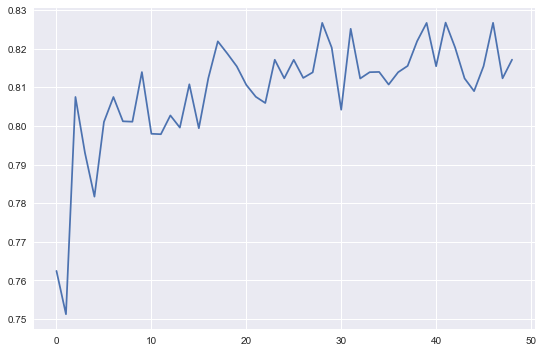

In [94]:
import matplotlib.pyplot as plt 
plt.style.use("seaborn")
plt.plot(acc_list)
plt.show()

In [95]:
print(np.argmax(acc_list))

41


So 42(because the index starts from 0) trees give will give us the best accuracy on the validation set 

###### Now let's train a random forest with 42 trees 

In [97]:
rf_ = RandomForestClassifier(n_estimators=42,max_depth=5,criterion="entropy")

In [98]:
rf_.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=42,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
rf_.score(X_train,y_train)

0.8587479935794543

In [100]:
rf_.score(X_test,y_test)

0.8283582089552238